<a href="https://colab.research.google.com/github/Jatingpt/NLP-Project-on-UpdataResume/blob/main/NLP_Project_on_UpdateResume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement.**
##**Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.**

##**Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.**

##**IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.**


**Insights that we are looking for-**

1.) In which domain the maximum number are applying for?

2.)

##**Approach that is used to build this project.**


* The approach we have used in this project is defined in the given format-

1) **Loading our data** : In this section we just loaded our dataset in colab notebook and read the csv file.

2) **Data Cleaning and Processing** : In this section we have tried to remove the null values and for some of the columns we have replaced the null values with the appropriate values with reasonable assumptions.

3) **Analysis and Visualization** : In this section we have tried to explore all variables which can play an important role for the analysis. In the next parts we have tried to explore the effect of one over the other. In the next part we tried to answers our hypothetical

## **Python Libraries we used:**

* **Numpy**

* **Pandas**

* **Seaborn**

* **Matplotlib**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
file_path = "/content/UpdatedResumeDataSet.csv"
df = pd.read_csv(file_path)
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [5]:
df.head(3)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."


In [6]:
df["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


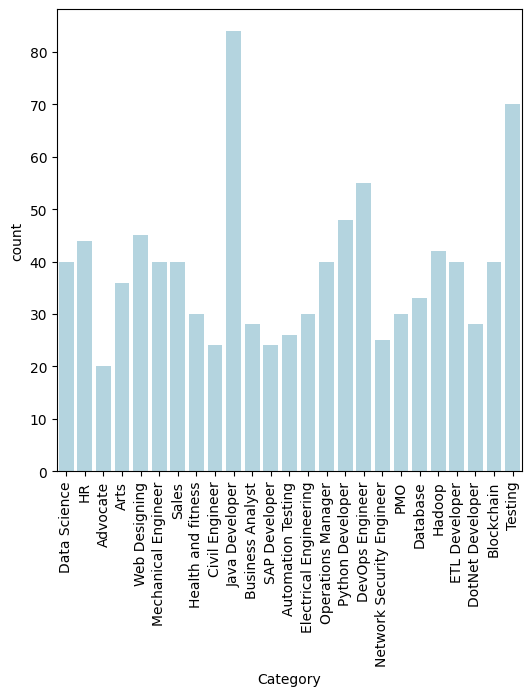

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x = df["Category"], color="lightblue")
plt.xticks(rotation=90)
plt.show()


##**-> The domain where the maximum number of candidates are applying for is "Java Developers" followed by "Testing", "DevOps Engineer", "Python Developer", "Operations Manager" and "Data Science".**

In [21]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

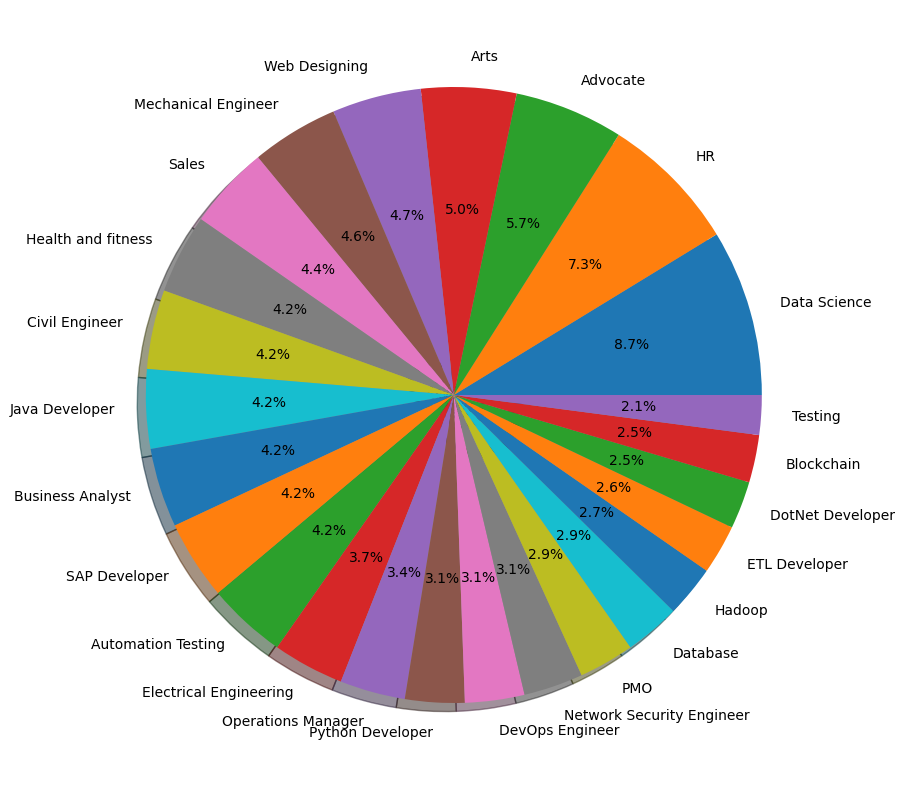

In [22]:
from enum import auto
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize = (15,10))
plt.pie(counts, labels = labels, autopct="%1.1f%%", shadow = True)
plt.show()

##**Exploring the Resume**

In [32]:
df["Resume"].unique()

array(['Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Inves

In [28]:
print(df["Category"][0])
print(df["Resume"][0])

Data Science
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Ser

###**As we can see that the first resume is regarging the Data Scientist. where a lot of stop words, puncuations, URLs, Links, and Special Characters are present which is quite difficult to read for the machine.**

###**So, we need to clean the data first.**

##**Data Cleaning.**

1.   Cleaning URLs
2.   Cleaning Punctuations
3.   Cleaning Stop words
4.   Cleaning Special Characters
5.   Cleaning the data if any sequence is present like "\n"
6.   Cleaning Mentions



In [35]:
#Creating a function to clean all the unnecessary words, characters and punctuations.
#first importing the regula
import re
def CleanResume(text):
  Cleantext = re.sub("http\S+\s", " ", text)  #Removing the urls which contains http along with the whole link attached with http, and replacing it with blank space.

  Cleantext = re.sub("@\s+", " ", Cleantext)  #removing the words which contains @ and replacing with space and now the new cleaned texts are stored in this variable

  Cleantext = re.sub("#\s+", " ", Cleantext)  #removing '#' and replacing with space also stored in Cleantext,

  Cleantext = re.sub("RT|cc", " ", Cleantext) #Some words contains RR|cc in the resume so we need to clean this too.

  Cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Cleantext)  #To clean all the special characters available in the
                                                                                                  #resume with the help of escape function

  Cleantext = re.sub(r'[^\x00-\x7f]', ' ', Cleantext) #removing other unneccesary syntax that is present in the resume.

  Cleantext = re.sub('\s+', ' ', Cleantext)

  return Cleantext

In [36]:
#Storing all the values in the resume column after applying this function with the help of lambda function.

df["Resume"] = df["Resume"].apply(lambda x: CleanResume(x))

In [37]:
#Now the resume columns after cleaning the data looks like.
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

##**Changing the Words into "Categorical Values".**